In [1]:
import pandas as pd 
import numpy as np


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\alisa\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\alisa\AppData\Roaming\Python\Python312\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\alisa\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelapp.py", line 701, in start
    self.io_lo

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\alisa\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\alisa\AppData\Roaming\Python\Python312\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\alisa\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelapp.py", line 701, in start
    self.io_lo

AttributeError: _ARRAY_API not found

In [2]:
df = pd.read_csv(r"C:\Users\alisa\OneDrive\Desktop\Panic Attack\panic_attack_dataset.csv",usecols=['Panic_Attack_Frequency', 'Duration_Minutes',
       'Trigger', 'Heart_Rate', 'Sweating', 'Shortness_of_Breath', 'Dizziness',
       'Chest_Pain', 'Trembling', 'Medical_History', 'Medication',
       'Caffeine_Intake', 'Exercise_Frequency', 'Sleep_Hours',
       'Alcohol_Consumption', 'Smoking', 'Therapy', 'Panic_Score'])

In [3]:
df.columns

Index(['Panic_Attack_Frequency', 'Duration_Minutes', 'Trigger', 'Heart_Rate',
       'Sweating', 'Shortness_of_Breath', 'Dizziness', 'Chest_Pain',
       'Trembling', 'Medical_History', 'Medication', 'Caffeine_Intake',
       'Exercise_Frequency', 'Sleep_Hours', 'Alcohol_Consumption', 'Smoking',
       'Therapy', 'Panic_Score'],
      dtype='object')

<Axes: ylabel='Heart_Rate'>

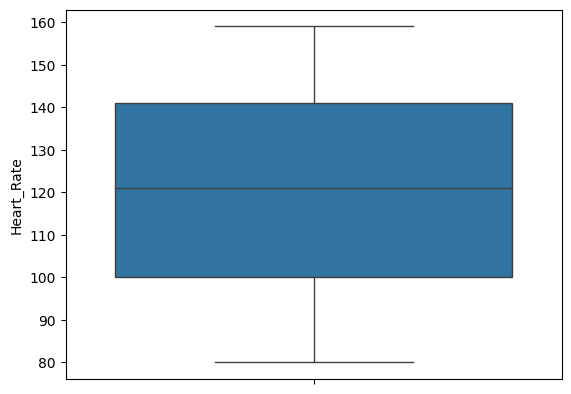

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(data=df['Heart_Rate'])

In [5]:
df.isnull().sum()

Panic_Attack_Frequency      0
Duration_Minutes            0
Trigger                     0
Heart_Rate                  0
Sweating                    0
Shortness_of_Breath         0
Dizziness                   0
Chest_Pain                  0
Trembling                   0
Medical_History           122
Medication                  0
Caffeine_Intake             0
Exercise_Frequency          0
Sleep_Hours                 0
Alcohol_Consumption         0
Smoking                     0
Therapy                     0
Panic_Score                 0
dtype: int64

Imputation part

In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer 
transformer = ColumnTransformer(transformers=[
    ("MODE on Medical History",SimpleImputer(strategy="most_frequent"),['Medical_History'])
],remainder='passthrough')

In [7]:
transorm_data = transformer.fit_transform(df)

In [8]:
colmns = ['Medical_History'] +[col for col in df.columns if col != 'Medical_History']

In [9]:
df = pd.DataFrame(transorm_data,columns=colmns)

In [10]:
print(df.isnull().sum())

Medical_History           0
Panic_Attack_Frequency    0
Duration_Minutes          0
Trigger                   0
Heart_Rate                0
Sweating                  0
Shortness_of_Breath       0
Dizziness                 0
Chest_Pain                0
Trembling                 0
Medication                0
Caffeine_Intake           0
Exercise_Frequency        0
Sleep_Hours               0
Alcohol_Consumption       0
Smoking                   0
Therapy                   0
Panic_Score               0
dtype: int64


In [11]:
df.shape

(1200, 18)

# Encoding part

In [12]:
df.columns

Index(['Medical_History', 'Panic_Attack_Frequency', 'Duration_Minutes',
       'Trigger', 'Heart_Rate', 'Sweating', 'Shortness_of_Breath', 'Dizziness',
       'Chest_Pain', 'Trembling', 'Medication', 'Caffeine_Intake',
       'Exercise_Frequency', 'Sleep_Hours', 'Alcohol_Consumption', 'Smoking',
       'Therapy', 'Panic_Score'],
      dtype='object')

In [13]:
from sklearn.preprocessing import OrdinalEncoder , OneHotEncoder
transformer = ColumnTransformer(transformers=[
    ("Ordinal Transformer(Y/N)",OrdinalEncoder(),['Sweating', 'Shortness_of_Breath', 'Dizziness','Chest_Pain', 'Trembling','Medication','Smoking','Therapy'])
],remainder='passthrough')

In [14]:
transorm_data = transformer.fit_transform(df) # apply cols. transormer

In [15]:
# converting to Dataframe

convert_df = ['Sweating', 'Shortness_of_Breath', 'Dizziness','Chest_Pain', 'Trembling','Medication','Smoking','Therapy']+['Medical_History','Panic_Attack_Frequency', 'Duration_Minutes','Trigger', 'Heart_Rate','Caffeine_Intake','Exercise_Frequency', 'Sleep_Hours', 'Alcohol_Consumption','Panic_Score']

In [16]:
df = pd.DataFrame(transorm_data,columns=convert_df)

In [17]:
df.head(2)

,Sweating,Shortness_of_Breath,Dizziness,Chest_Pain,Trembling,Medication,Smoking,Therapy,Medical_History,Panic_Attack_Frequency,Duration_Minutes,Trigger,Heart_Rate,Caffeine_Intake,Exercise_Frequency,Sleep_Hours,Alcohol_Consumption,Panic_Score
0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,Anxiety,9,5,Caffeine,134,2,3,6.4,5,5
1,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,PTSD,8,9,Stress,139,2,5,5.0,3,7


In [18]:
transformer = ColumnTransformer(transformers=[
    ("One hot encoding",OneHotEncoder(),['Medical_History','Trigger'])
],remainder='passthrough')

In [19]:
transorm_data=transformer.fit_transform(df)

In [20]:
df.columns

Index(['Sweating', 'Shortness_of_Breath', 'Dizziness', 'Chest_Pain',
       'Trembling', 'Medication', 'Smoking', 'Therapy', 'Medical_History',
       'Panic_Attack_Frequency', 'Duration_Minutes', 'Trigger', 'Heart_Rate',
       'Caffeine_Intake', 'Exercise_Frequency', 'Sleep_Hours',
       'Alcohol_Consumption', 'Panic_Score'],
      dtype='object')

In [21]:
# Retrieve feature names for the one-hot encoded columns
ohe_feature_names = transformer.named_transformers_['One hot encoding'].get_feature_names_out(['Medical_History', 'Trigger'])

In [22]:
ohe_feature_names

array(['Medical_History_Anxiety', 'Medical_History_Depression',
       'Medical_History_PTSD', 'Trigger_Caffeine', 'Trigger_PTSD',
       'Trigger_Phobia', 'Trigger_Social Anxiety', 'Trigger_Stress',
       'Trigger_Unknown'], dtype=object)

In [23]:
# remaining cols
remaning_cols = ['Sweating', 'Shortness_of_Breath', 'Dizziness', 'Chest_Pain','Trembling', 'Medication', 'Smoking', 'Therapy','Panic_Attack_Frequency', 'Duration_Minutes', 'Heart_Rate','Caffeine_Intake', 'Exercise_Frequency', 'Sleep_Hours','Alcohol_Consumption', 'Panic_Score']

In [24]:
all_column_names = list(ohe_feature_names) + remaning_cols

# Convert to DataFrame
df = pd.DataFrame(transorm_data, columns=all_column_names)

In [25]:
df.head(2)

,Medical_History_Anxiety,Medical_History_Depression,Medical_History_PTSD,Trigger_Caffeine,Trigger_PTSD,Trigger_Phobia,Trigger_Social Anxiety,Trigger_Stress,Trigger_Unknown,Sweating,...,Smoking,Therapy,Panic_Attack_Frequency,Duration_Minutes,Heart_Rate,Caffeine_Intake,Exercise_Frequency,Sleep_Hours,Alcohol_Consumption,Panic_Score
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,9,5,134,2,3,6.4,5,5
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,8,9,139,2,5,5.0,3,7


In [26]:
df.shape

(1200, 25)

In [27]:
df = df.sample(1200)

In [28]:
df.head(2)

,Medical_History_Anxiety,Medical_History_Depression,Medical_History_PTSD,Trigger_Caffeine,Trigger_PTSD,Trigger_Phobia,Trigger_Social Anxiety,Trigger_Stress,Trigger_Unknown,Sweating,...,Smoking,Therapy,Panic_Attack_Frequency,Duration_Minutes,Heart_Rate,Caffeine_Intake,Exercise_Frequency,Sleep_Hours,Alcohol_Consumption,Panic_Score
641,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,2,23,148,1,0,5.4,3,7
656,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1,44,109,4,6,7.5,2,2


In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X = df.drop(columns=['Panic_Score'])
y=df['Panic_Score']

In [31]:
X_train , x_test , y_train , y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [33]:
lr = LinearRegression()

In [34]:
lr.fit(X_train,y_train)

LinearRegression()

In [35]:
y_pred = lr.predict(x_test)

In [36]:
print(X_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_pred.shape)

(840, 24)
(360, 24)
(840,)
(360,)
(360,)


In [37]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error,r2_score

In [38]:
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test,y_pred))
print(root_mean_squared_error(y_test,y_pred))

2.419858087313119
7.832287270726422
2.7986223880199383


# Visualization of Original vs Predicted Data

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [40]:
# Creating a DataFrame for comparision
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})


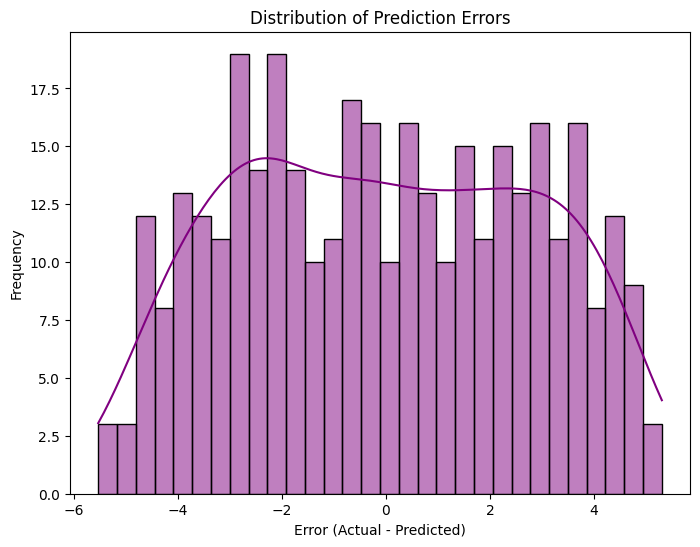

In [41]:
errors = comparison_df['Actual'] - comparison_df['Predicted']
plt.figure(figsize=(8, 6))
sns.histplot(errors, kde=True, bins=30, color='purple')
plt.title('Distribution of Prediction Errors')
plt.xlabel('Error (Actual - Predicted)')
plt.ylabel('Frequency')
plt.show()


In [42]:
df.columns

Index(['Medical_History_Anxiety', 'Medical_History_Depression',
       'Medical_History_PTSD', 'Trigger_Caffeine', 'Trigger_PTSD',
       'Trigger_Phobia', 'Trigger_Social Anxiety', 'Trigger_Stress',
       'Trigger_Unknown', 'Sweating', 'Shortness_of_Breath', 'Dizziness',
       'Chest_Pain', 'Trembling', 'Medication', 'Smoking', 'Therapy',
       'Panic_Attack_Frequency', 'Duration_Minutes', 'Heart_Rate',
       'Caffeine_Intake', 'Exercise_Frequency', 'Sleep_Hours',
       'Alcohol_Consumption', 'Panic_Score'],
      dtype='object')

In [43]:
import matplotlib.pyplot as plt

def viz(data):
    """
    Visualize all columns in the dataset using line plots.
    
    Args:
    data (pd.DataFrame): The DataFrame to visualize.
    """
    for column in data.columns:
        plt.figure(figsize=(10, 5))
        sns.kdeplot(data[column], label=column)
        plt.title(f"Visualization of {column}")
        plt.xlabel("Index")
        plt.ylabel("Values")
        plt.legend()
        plt.grid(True)
        plt.show()


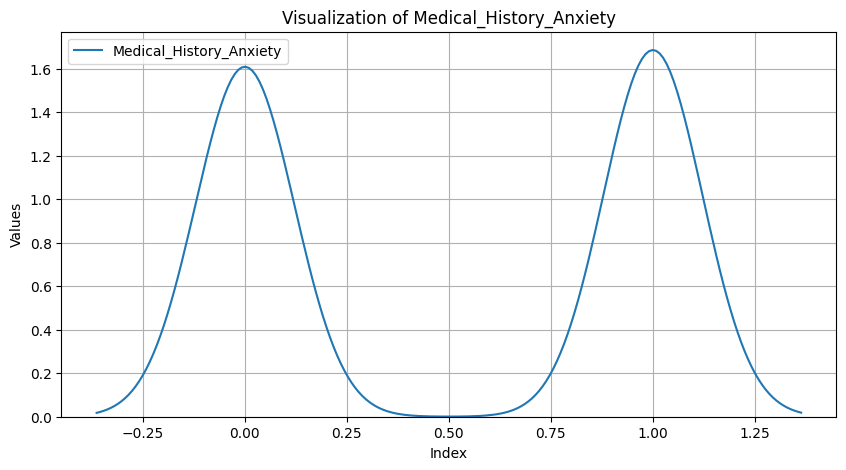

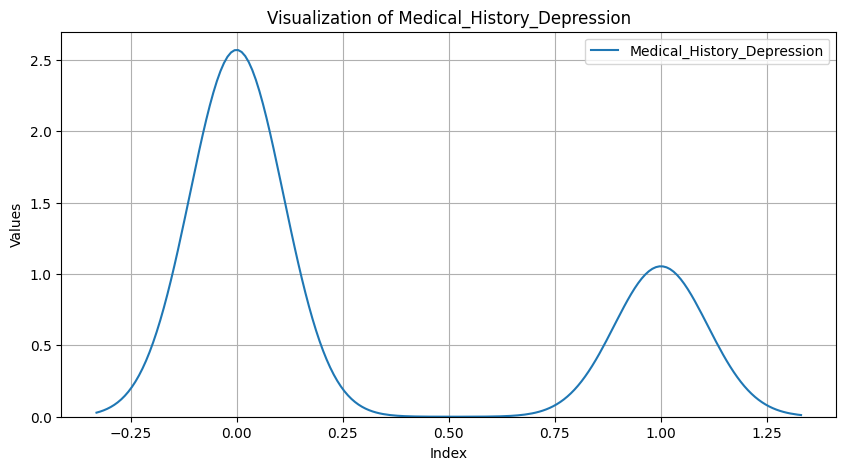

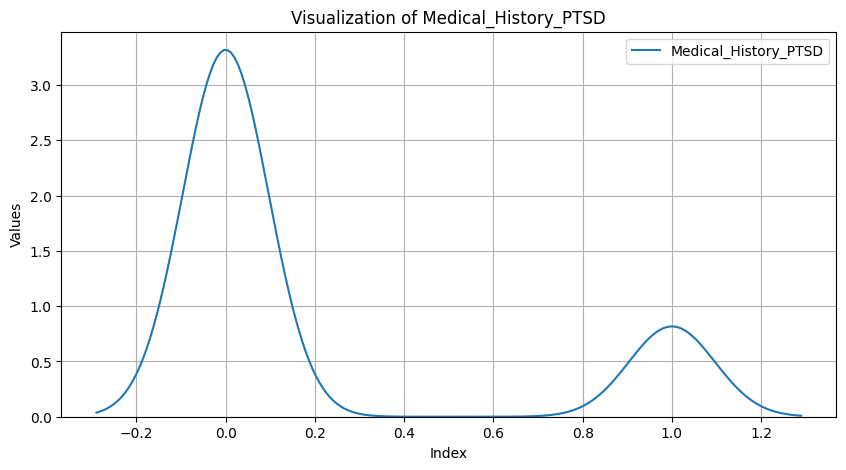

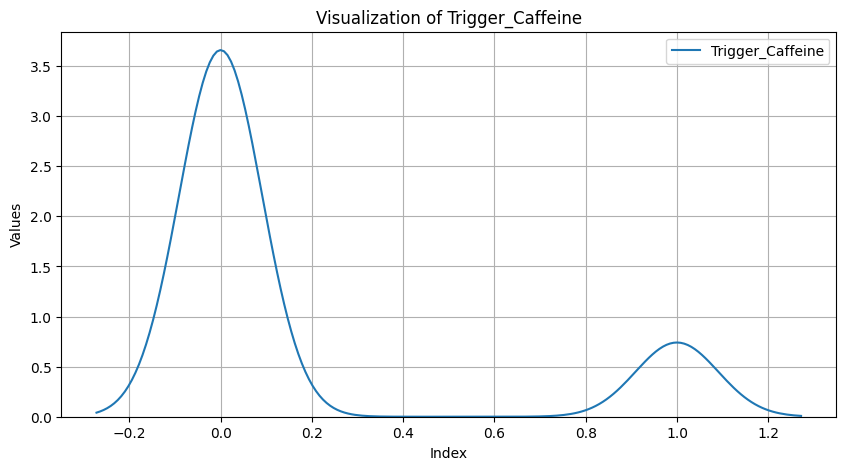

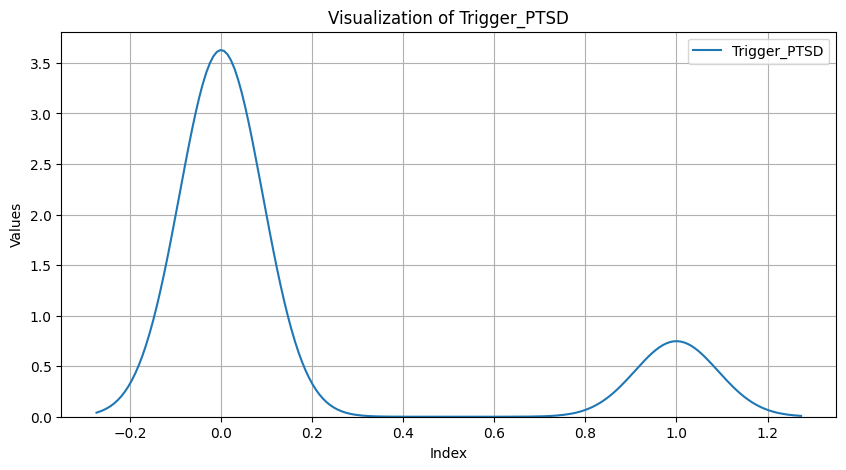

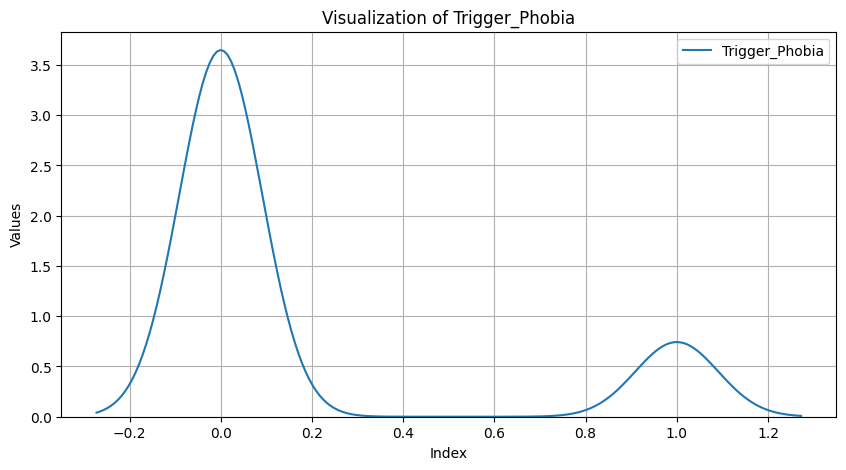

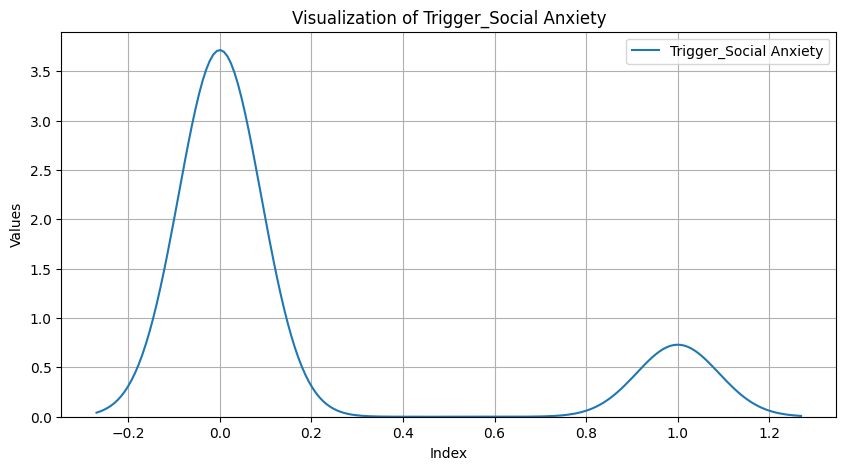

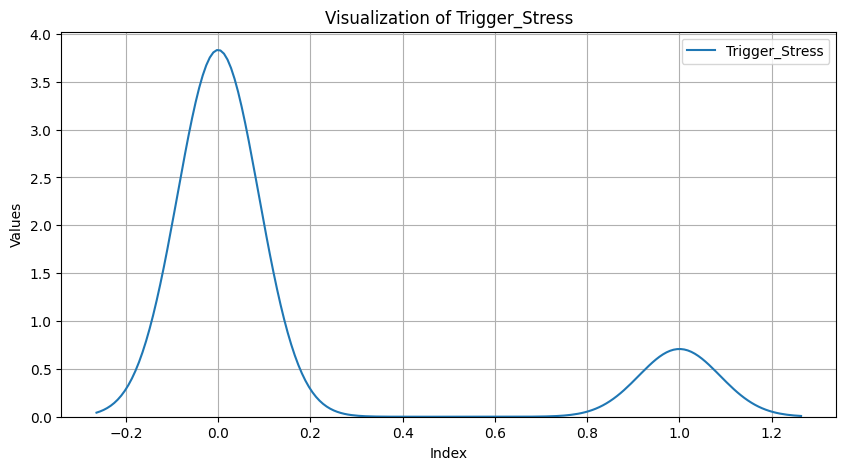

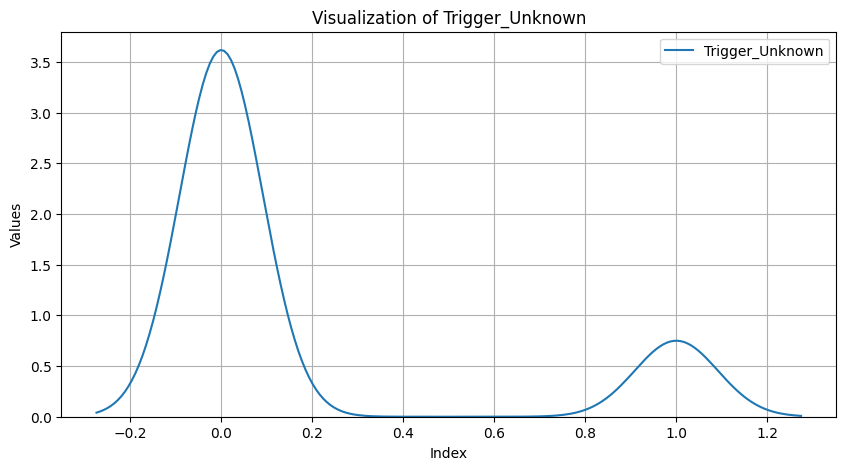

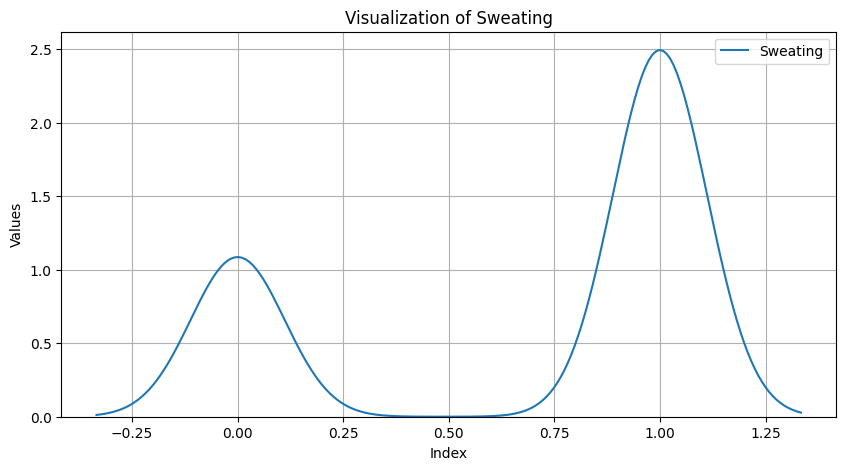

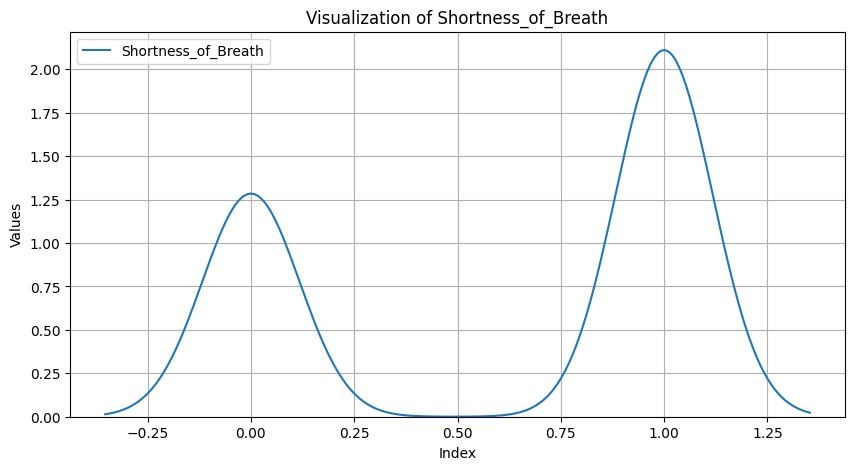

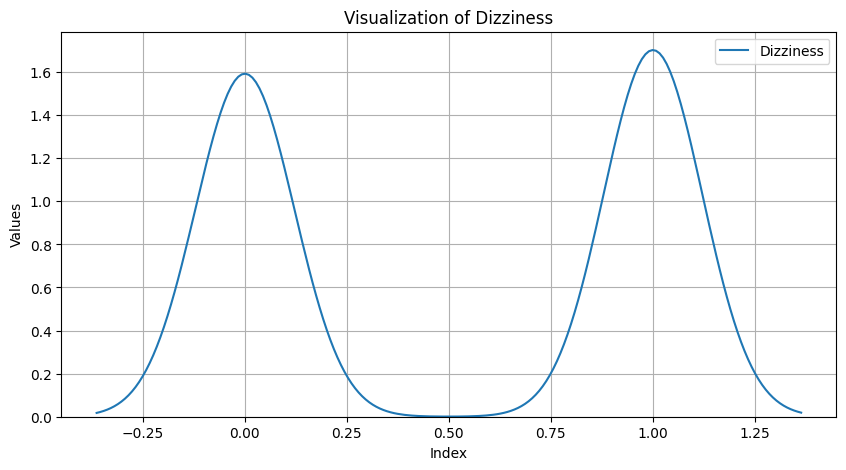

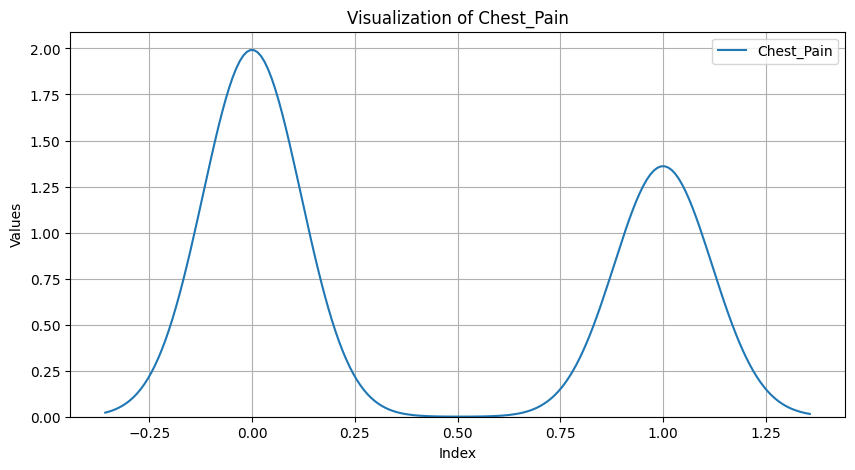

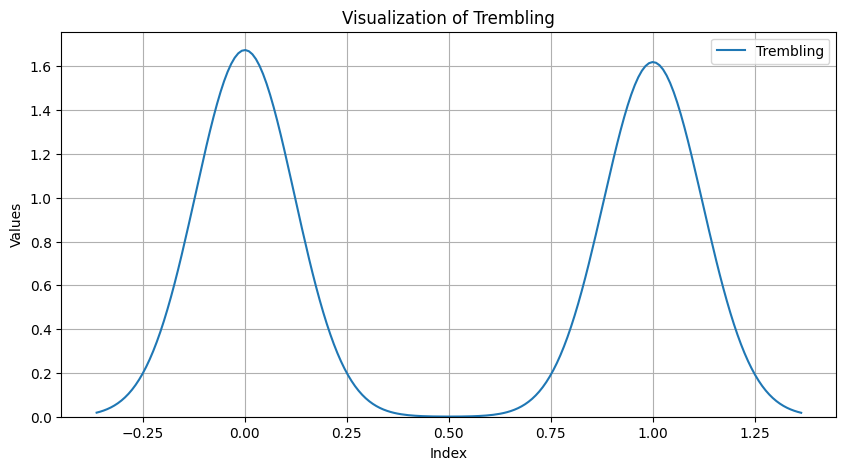

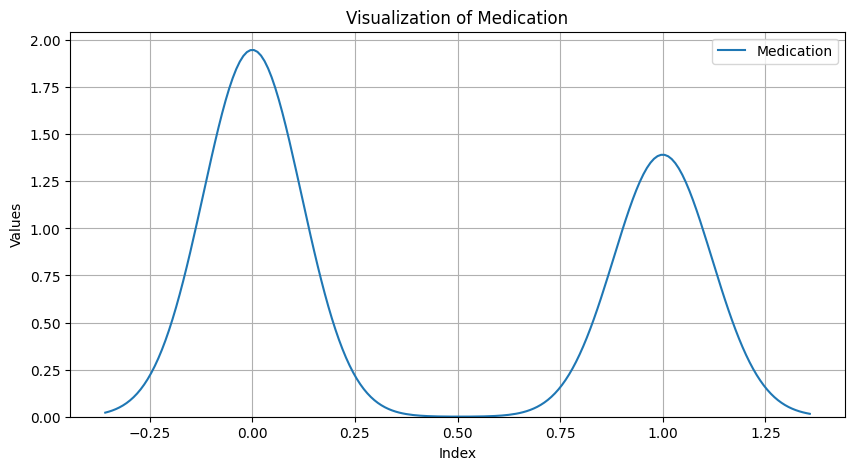

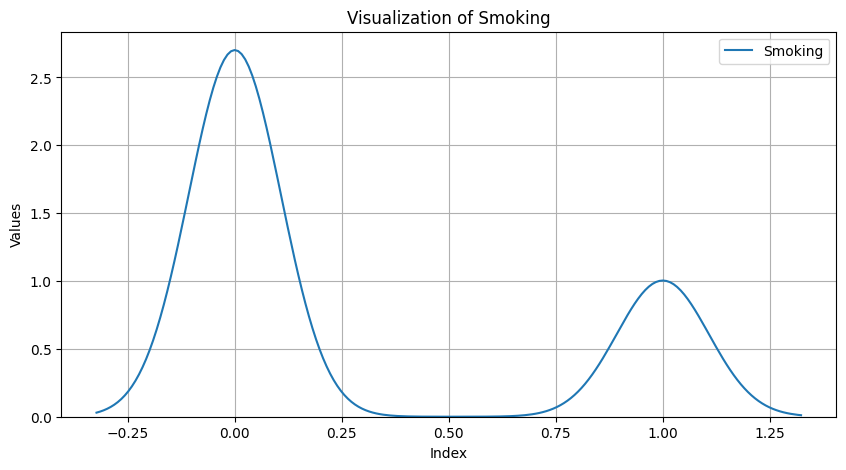

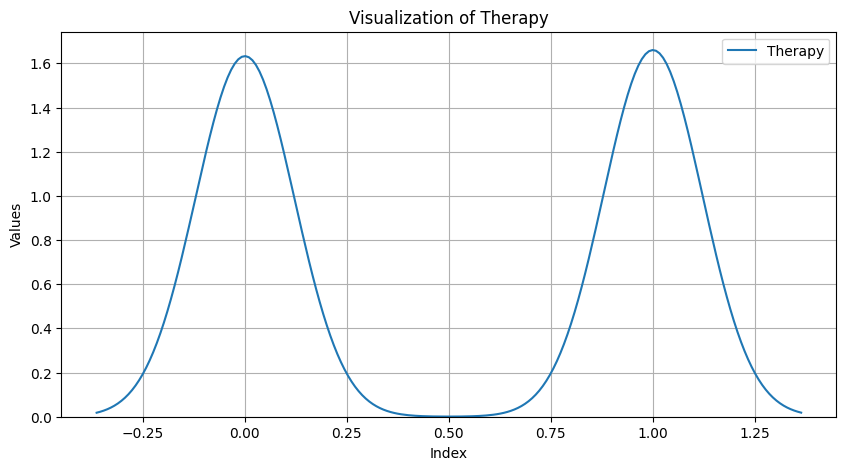

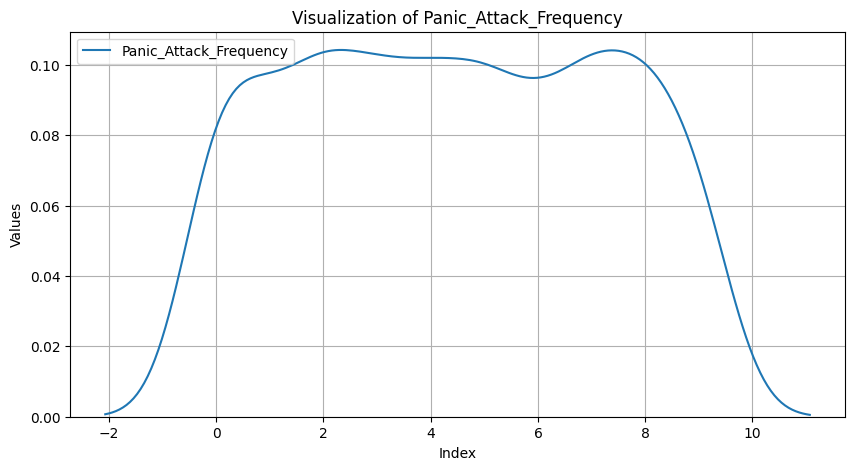

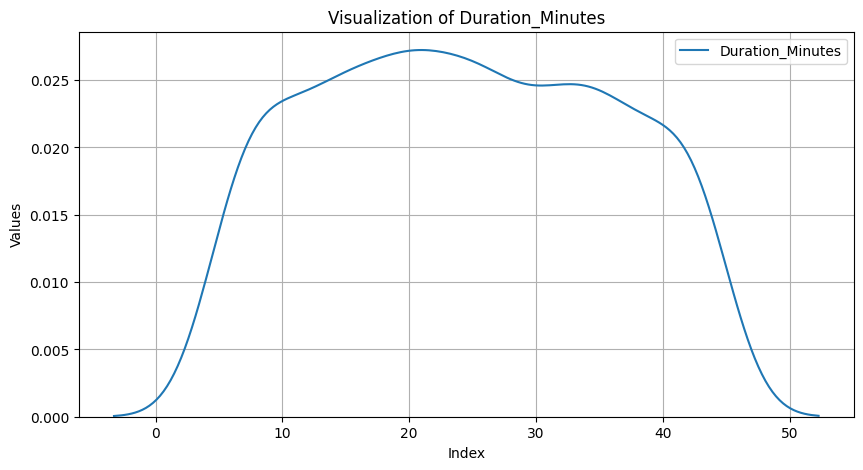

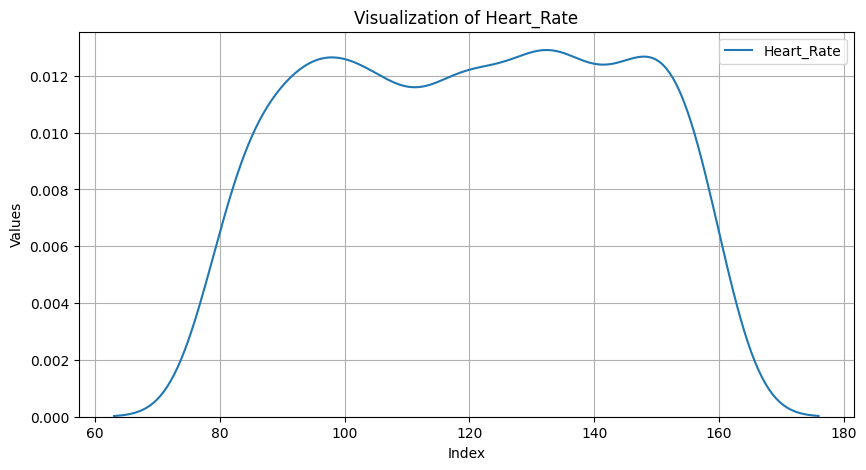

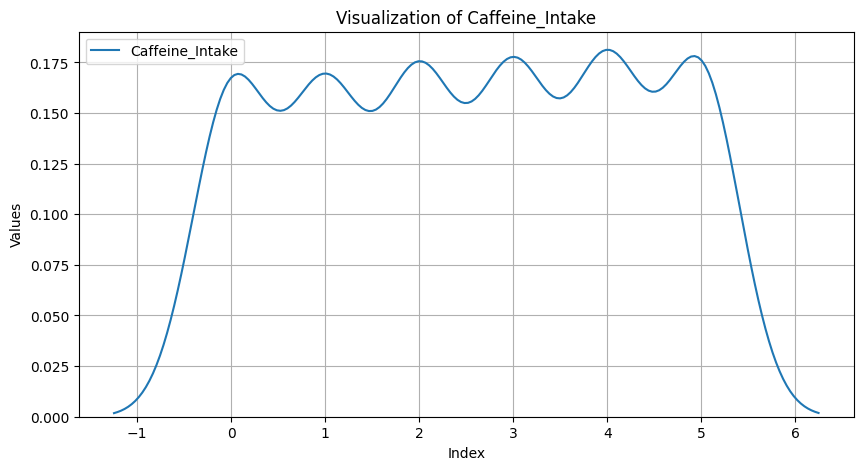

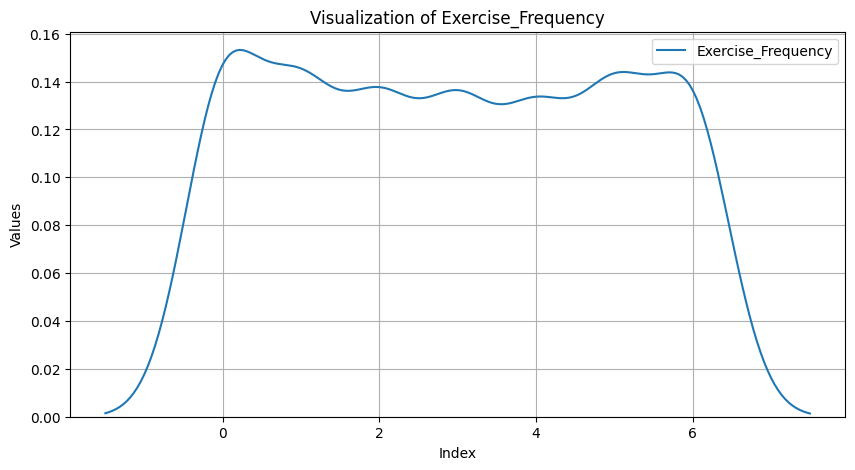

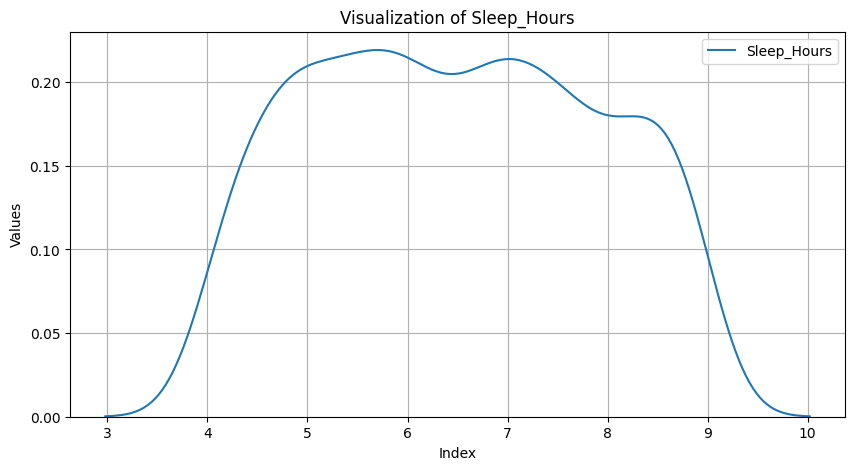

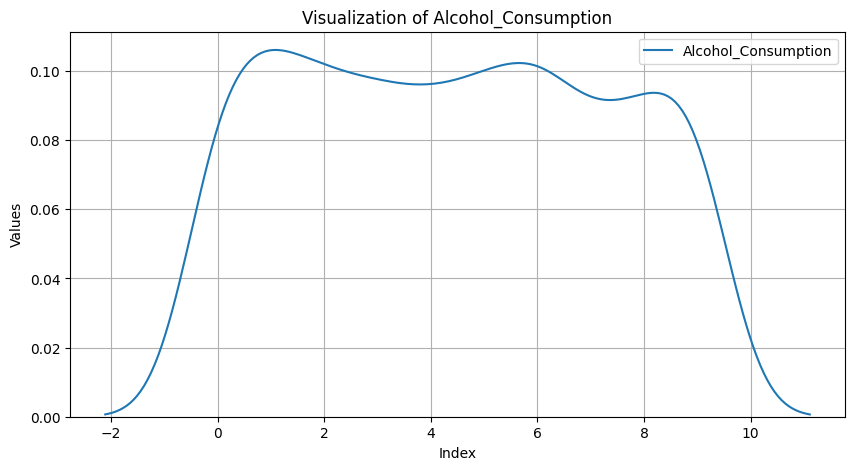

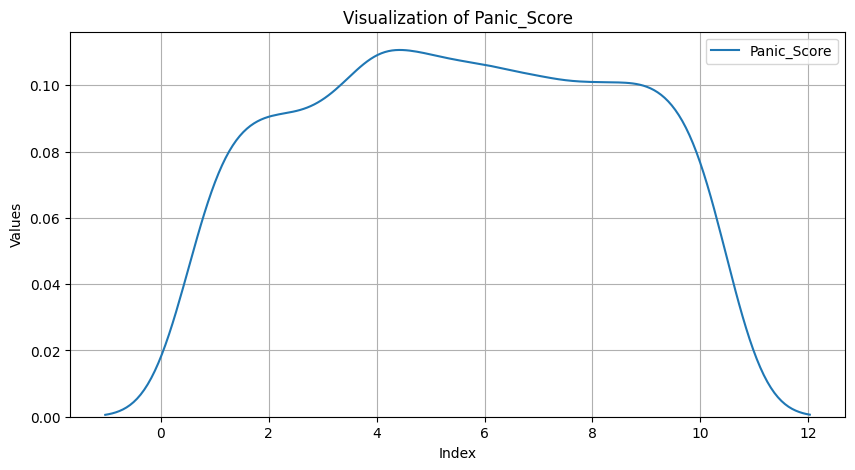

In [44]:
viz(df)

# Scaalling

In [45]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [46]:
scale_df = scale.fit_transform(df)

In [47]:
df = pd.DataFrame(scale_df,columns=df.columns)

In [48]:
df

,Medical_History_Anxiety,Medical_History_Depression,Medical_History_PTSD,Trigger_Caffeine,Trigger_PTSD,Trigger_Phobia,Trigger_Social Anxiety,Trigger_Stress,Trigger_Unknown,Sweating,...,Smoking,Therapy,Panic_Attack_Frequency,Duration_Minutes,Heart_Rate,Caffeine_Intake,Exercise_Frequency,Sleep_Hours,Alcohol_Consumption,Panic_Score
0,0.976933,-0.640395,-0.496091,-0.449894,-0.453905,-0.451233,2.256407,-0.429651,-0.455240,0.659854,...,-0.609449,0.991701,-0.847543,-0.122201,1.185672,-0.896878,-1.434008,-0.769789,-0.488272,0.512478
1,0.976933,-0.640395,-0.496091,-0.449894,-0.453905,-0.451233,-0.443183,-0.429651,2.196644,-1.515488,...,1.640825,-1.008368,-1.198857,1.720684,-0.483836,0.851233,1.477684,0.724831,-0.832935,-1.278359
2,-1.023612,-0.640395,2.015761,2.222745,-0.453905,-0.451233,-0.443183,-0.429651,-0.455240,0.659854,...,-0.609449,-1.008368,-1.198857,0.141068,-0.826300,-0.896878,0.021838,-1.623857,-1.522260,-0.920191
3,0.976933,-0.640395,-0.496091,-0.449894,-0.453905,2.216152,-0.443183,-0.429651,-0.455240,0.659854,...,-0.609449,0.991701,-0.496230,-0.297714,1.356904,-0.314174,0.507120,-0.413927,0.890378,0.870645
4,-1.023612,-0.640395,2.015761,-0.449894,-0.453905,-0.451233,-0.443183,2.327469,-0.455240,0.659854,...,-0.609449,-1.008368,1.611650,1.545171,0.757593,0.268529,-1.434008,-0.983306,1.579703,1.228812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,0.976933,-0.640395,-0.496091,2.222745,-0.453905,-0.451233,-0.443183,-0.429651,-0.455240,-1.515488,...,-0.609449,0.991701,-0.144917,-1.526303,-1.040339,-0.896878,-0.948726,-0.983306,-1.177597,1.586980
1196,0.976933,-0.640395,-0.496091,-0.449894,2.203102,-0.451233,-0.443183,-0.429651,-0.455240,-1.515488,...,-0.609449,-1.008368,0.909023,0.579850,0.500745,0.851233,0.507120,0.084280,1.579703,0.512478
1197,-1.023612,1.561536,-0.496091,-0.449894,-0.453905,-0.451233,-0.443183,-0.429651,2.196644,-1.515488,...,-0.609449,0.991701,0.206397,-0.122201,0.671977,-0.314174,0.021838,0.796004,0.201053,0.512478
1198,0.976933,-0.640395,-0.496091,-0.449894,-0.453905,-0.451233,-0.443183,2.327469,-0.455240,-1.515488,...,1.640825,-1.008368,-1.198857,-0.297714,0.115474,-0.314174,-1.434008,0.938349,1.235041,0.870645


In [49]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split



In [50]:
df.columns

Index(['Medical_History_Anxiety', 'Medical_History_Depression',
       'Medical_History_PTSD', 'Trigger_Caffeine', 'Trigger_PTSD',
       'Trigger_Phobia', 'Trigger_Social Anxiety', 'Trigger_Stress',
       'Trigger_Unknown', 'Sweating', 'Shortness_of_Breath', 'Dizziness',
       'Chest_Pain', 'Trembling', 'Medication', 'Smoking', 'Therapy',
       'Panic_Attack_Frequency', 'Duration_Minutes', 'Heart_Rate',
       'Caffeine_Intake', 'Exercise_Frequency', 'Sleep_Hours',
       'Alcohol_Consumption', 'Panic_Score'],
      dtype='object')

In [51]:
X = df.drop(columns=['Panic_Score'])
y = df['Panic_Score']

In [52]:
X_train , X_test ,y_train , y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [53]:
pca = PCA(n_components=10)

X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.fit_transform(X_test)

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize models
clf1 = LinearRegression()
clf2 = DecisionTreeRegressor()
clf3 = RandomForestRegressor()
clf4 = GradientBoostingRegressor()

# Train models
clf1.fit(X_train_trf, y_train)
clf2.fit(X_train_trf, y_train)
clf3.fit(X_train_trf, y_train)
clf4.fit(X_train_trf, y_train)

# Make predictions
y_pred1 = clf1.predict(X_test_trf)
y_pred2 = clf2.predict(X_test_trf)
y_pred3 = clf3.predict(X_test_trf)
y_pred4 = clf4.predict(X_test_trf)

# Evaluate models
print("Linear Regression:")
print("MAE:", mean_absolute_error(y_test, y_pred1))
print("MSE:", mean_squared_error(y_test, y_pred1))
print("R²:", r2_score(y_test, y_pred1))

print("\nDecision Tree:")
print("MAE:", mean_absolute_error(y_test, y_pred2))
print("MSE:", mean_squared_error(y_test, y_pred2))
print("R²:", r2_score(y_test, y_pred2))

print("\nRandom Forest:")
print("MAE:", mean_absolute_error(y_test, y_pred3))
print("MSE:", mean_squared_error(y_test, y_pred3))
print("R²:", r2_score(y_test, y_pred3))

print("\nGradient Boosting:")
print("MAE:", mean_absolute_error(y_test, y_pred4))
print("MSE:", mean_squared_error(y_test, y_pred4))
print("R²:", r2_score(y_test, y_pred4))


Linear Regression:
MAE: 0.8650194617088208
MSE: 0.9951237899709775
R²: -0.0027666674362134547

Decision Tree:
MAE: 1.1282269712942146
MSE: 1.963454971625654
R²: -0.9785349505266516

Random Forest:
MAE: 0.8990993950252045
MSE: 1.0895906508184996
R²: -0.09795906479412708

Gradient Boosting:
MAE: 0.8900363687397495
MSE: 1.100391837906293
R²: -0.10884320854542606


# Gradient decent

In [55]:
from sklearn.linear_model import SGDRegressor
reg = SGDRegressor(max_iter=1000,learning_rate='constant',eta0=0.01)
reg.fit(X_train_trf, y_train)

SGDRegressor(learning_rate='constant')

In [56]:
y_pred = reg.predict(X_test_trf)
r2_score(y_test,y_pred)

-0.06934340210339762

## EDA with encoded dataset

In [57]:
df.head(1)

,Medical_History_Anxiety,Medical_History_Depression,Medical_History_PTSD,Trigger_Caffeine,Trigger_PTSD,Trigger_Phobia,Trigger_Social Anxiety,Trigger_Stress,Trigger_Unknown,Sweating,...,Smoking,Therapy,Panic_Attack_Frequency,Duration_Minutes,Heart_Rate,Caffeine_Intake,Exercise_Frequency,Sleep_Hours,Alcohol_Consumption,Panic_Score
0,0.976933,-0.640395,-0.496091,-0.449894,-0.453905,-0.451233,2.256407,-0.429651,-0.45524,0.659854,...,-0.609449,0.991701,-0.847543,-0.122201,1.185672,-0.896878,-1.434008,-0.769789,-0.488272,0.512478


In [60]:
# pandas profiling
from ydata_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_file(output_file='EDA.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Lasso regression
L1 regularization to Linear Regression for feature selection